# Deskripsi Project

aaaa

# Import Library

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')


# Load Data

In [2]:
url = 'https://raw.githubusercontent.com/yogaaditandanu/Loan-Prediction-Status/main/loan_data.csv'

df = pd.read_csv(url)

# Tampilkan 5 baris pertama
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


**Deskripsi Kolom**

person_age: Usia peminjam.

person_gender: Jenis kelamin peminjam.

person_education: Tingkat pendidikan terakhir peminjam.

person_income: Pendapatan tahunan peminjam.

person_emp_exp: Pengalaman kerja peminjam (dalam tahun).

person_home_ownership: Status kepemilikan rumah (misalnya, RENT/sewa, OWN/milik sendiri, MORTGAGE/hipotek).

loan_amnt: Jumlah uang yang dipinjam.

loan_intent: Tujuan peminjaman (misalnya, PERSONAL, EDUCATION, MEDICAL).

loan_int_rate: Suku bunga pinjaman (dalam persen).

loan_percent_income: Rasio antara jumlah pinjaman dengan pendapatan tahunan.

cb_person_cred_hist_length: Lamanya riwayat kredit peminjam (dalam tahun).

credit_score: Skor kredit peminjam, yang merepresentasikan kelayakan kredit.

previous_loan_defaults_on_file: Apakah peminjam pernah gagal bayar pada pinjaman sebelumnya (Yes/No).

loan_status: Ini adalah variabel target kita. Angka 1 biasanya berarti gagal bayar (default), dan 0 berarti lunas (non-default).

In [3]:
# Informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Berisi 45,000 data peminjam.

Memiliki 14 atribut (kolom).

Sangat bersih dari data yang hilang (tidak ada nilai null).

Terdiri dari campuran data numerik (angka) dan kategorikal (teks), yang akan memerlukan perlakuan berbeda saat pemodelan nanti.

In [4]:
# Statistik deskriptif
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


**Identifikasi Outlier yang Jelas:**

1. Pada person_age, nilai max adalah 144. Ini sangat tidak realistis dan menegaskan temuan kita sebelumnya bahwa ada outlier yang perlu ditangani.

2. Pada person_emp_exp (pengalaman kerja), nilai max adalah 125 tahun, yang juga tidak mungkin dan merupakan outlier.

3. Distribusi Pendapatan (person_income):

```

> Rata-rata pendapatan adalah sekitar $80,319 (nilai 8.031905e+04 adalah notasi ilmiah untuk 8.031905×10^4). Namun, median 50% adalah $67,048, yang lebih rendah dari rata-rata. Ini, ditambah dengan nilai max yang sangat tinggi (7.2×10^6 atau 7.2 juta), menunjukkan bahwa distribusi pendapatan sangat condong ke kanan (right-skewed). Artinya, ada beberapa orang dengan pendapatan sangat tinggi yang "menarik" nilai rata-rata ke atas.


```



4. Proporsi Gagal Bayar (loan_status):

- Ini adalah salah satu wawasan paling penting. Karena loan_status hanya berisi nilai 0 (lunas) dan 1 (gagal bayar), nilai mean-nya (0.222222) secara langsung memberi tahu kita proporsi kelas positif.

- Artinya, sekitar 22.2% dari pinjaman dalam dataset ini berakhir dengan gagal bayar. Informasi ini krusial untuk memahami masalah ketidakseimbangan kelas (class imbalance) yang mungkin perlu kita tangani saat pemodelan.

# Data Cleaning

In [5]:
#1. Pemeriksaan Missing Values & Duplikasi
# Cek jumlah missing values per kolom
print("Missing Values:")
print(df.isnull().sum())

# Cek duplikasi baris
print("\nJumlah baris duplikat:", df.duplicated().sum())


Missing Values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Jumlah baris duplikat: 0


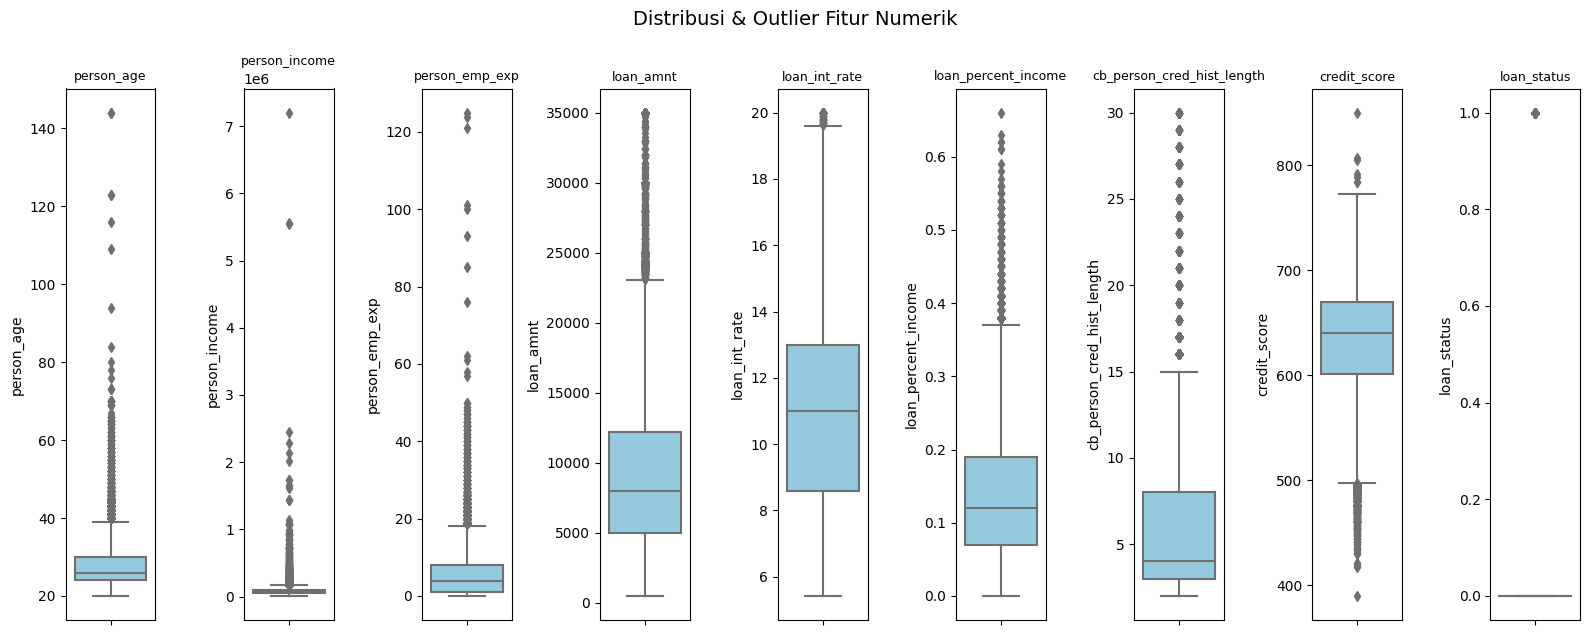

In [6]:
#2. Pembersihan Nilai Anomali (Outlier & Nilai Tidak Wajar)
# Ambil hanya kolom numerik
num_cols = df.select_dtypes(include='number').columns.tolist()

# Ukuran plot
plt.figure(figsize=(16, 6))

# Loop untuk setiap kolom numerik
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)  # Satu baris, beberapa kolom
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=9)
    plt.xlabel("")  # Hilangkan label X
    plt.tight_layout()

plt.suptitle('Distribusi & Outlier Fitur Numerik', fontsize=14, y=1.05)
plt.show()

1. person_age (Usia Peminjam):

- Distribusi: Sebagian besar peminjam berusia muda, dengan median sekitar 28-30 tahun. Distribusinya condong ke kanan (right-skewed), yang berarti ada lebih banyak peminjam muda dibandingkan yang tua.

- Outlier: Terdapat banyak outlier di sisi usia yang lebih tua. Bahkan ada beberapa titik yang sangat ekstrim (di atas 120 tahun), yang kemungkinan besar merupakan kesalahan input data.

2. person_income (Pendapatan Peminjam):

- Distribusi: Median pendapatan relatif rendah. Distribusinya sangat condong ke kanan, yang merupakan hal umum untuk data pendapatan. Artinya, mayoritas orang memiliki pendapatan di rentang bawah, sementara segelintir orang memiliki pendapatan yang sangat tinggi.

- Outlier: Sangat banyak outlier di sisi pendapatan tinggi.

3. person_emp_exp (Lama Pengalaman Kerja):

- Distribusi: Mirip dengan usia, median pengalaman kerja ada di angka yang rendah (sekitar 4-5 tahun). Distribusinya juga condong ke kanan.

- Outlier: Banyak outlier yang menunjukkan orang dengan pengalaman kerja sangat lama. Beberapa nilai tampak tidak realistis (misalnya di atas 40 tahun), yang mungkin juga menandakan masalah kualitas data.

4. loan_amnt (Jumlah Pinjaman):

- Distribusi: Median jumlah pinjaman berada di sekitar angka 10,000. Data ini juga condong ke kanan.

- Outlier: Ada banyak outlier untuk pinjaman dengan jumlah yang sangat besar.

5. loan_int_rate (Suku Bunga Pinjaman):

- Distribusi: Distribusinya terlihat lebih simetris dibandingkan fitur-fitur sebelumnya. Median suku bunga ada di sekitar 11-12%. Rentang datanya (IQR) juga terlihat lebih lebar.

- Outlier: Ada beberapa outlier di sisi suku bunga yang lebih tinggi.

6. loan_percent_income (Persentase Pinjaman dari Pendapatan):

- Distribusi: Median rasio pinjaman terhadap pendapatan ada di sekitar 0.15 (atau 15%). Distribusinya condong ke kanan.

- Outlier: Banyak outlier yang menunjukkan pinjaman memakan porsi yang sangat besar dari pendapatan seseorang.

7. cb_person_cred_hist_length (Lama Sejarah Kredit):

- Distribusi: Median lama sejarah kredit ada di sekitar 4-5 tahun. Distribusinya juga agak condong ke kanan.

- Outlier: Ada outlier untuk orang-orang dengan riwayat kredit yang sangat panjang.

8. credit_score (Skor Kredit):

- Distribusi: Distribusi ini tampaknya sedikit condong ke kiri (left-skewed). Median skor kreditnya cukup tinggi (di atas 600), yang menandakan mayoritas individu dalam dataset ini memiliki skor kredit yang baik.

- Outlier: Terdapat beberapa outlier di sisi skor kredit yang rendah.

9. loan_status (Status Pinjaman):

- Distribusi: Box plot ini terlihat "gepeng" di angka 0. Ini menandakan bahwa loan_status adalah variabel biner (hanya memiliki nilai 0 dan 1). Mayoritas data memiliki nilai 0 (misalnya, pinjaman lunas/disetujui), dan sebagian kecil memiliki nilai 1 (misalnya, pinjaman gagal bayar/ditolak). Variabel seperti ini sebenarnya lebih cocok divisualisasikan dengan diagram batang (bar chart).

In [7]:
# Salin dataframe agar tidak ubah yang asli
df_cleaned = df.copy()

# Fungsi untuk mendeteksi dan menangani outlier dengan metode IQR
def remove_outliers_iqr(data, column, hard_cap=None):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if hard_cap:  # Untuk membuat batas khusus
        data = data[data[column] <= hard_cap]
    else:
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

# Tangani outlier berdasarkan analisis deskriptif
df_cleaned = remove_outliers_iqr(df_cleaned, 'person_age', hard_cap=80)
df_cleaned = remove_outliers_iqr(df_cleaned, 'person_income')
df_cleaned = remove_outliers_iqr(df_cleaned, 'person_emp_exp', hard_cap=40)
df_cleaned = remove_outliers_iqr(df_cleaned, 'loan_amnt')
df_cleaned = remove_outliers_iqr(df_cleaned, 'loan_int_rate')
df_cleaned = remove_outliers_iqr(df_cleaned, 'loan_percent_income')
df_cleaned = remove_outliers_iqr(df_cleaned, 'cb_person_cred_hist_length')
df_cleaned = remove_outliers_iqr(df_cleaned, 'credit_score')

# Cek shape sebelum dan sesudah
print("Jumlah data sebelum pembersihan:", df.shape)
print("Jumlah data setelah pembersihan:", df_cleaned.shape)


Jumlah data sebelum pembersihan: (45000, 14)
Jumlah data setelah pembersihan: (38379, 14)


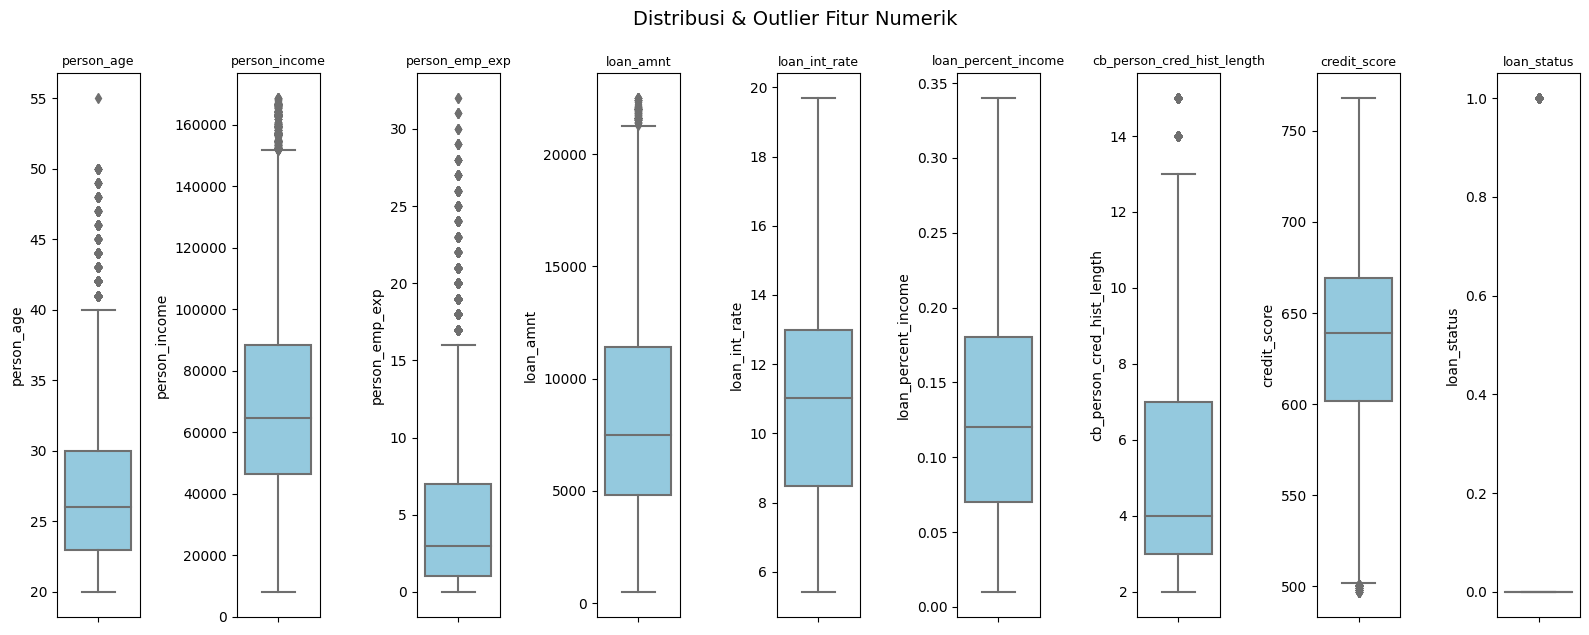

In [8]:
# Box Plot Setelah Penanganan Outlier
num_cols = df_cleaned.select_dtypes(include='number').columns.tolist()

# Ukuran plot
plt.figure(figsize=(16, 6))

# Loop untuk setiap kolom numerik
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)  # Satu baris, beberapa kolom
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(col, fontsize=9)
    plt.xlabel("")  # Hilangkan label X
    plt.tight_layout()

plt.suptitle('Distribusi & Outlier Fitur Numerik', fontsize=14, y=1.05)
plt.show()

# Exploratory Data Analysis

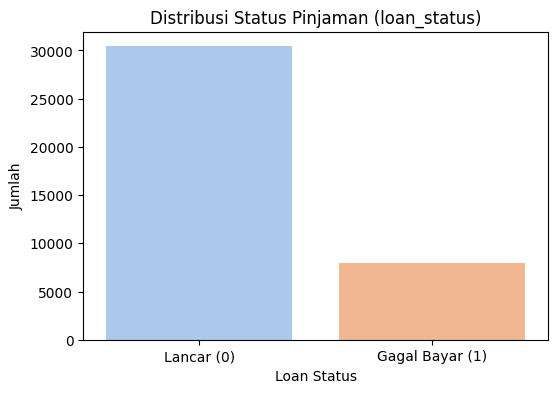

loan_status
0    0.792647
1    0.207353
Name: proportion, dtype: float64

In [9]:
#1. Distribusi Target: loan_status
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='loan_status', palette='pastel')
plt.title('Distribusi Status Pinjaman (loan_status)')
plt.xticks([0, 1], ['Lancar (0)', 'Gagal Bayar (1)'])
plt.xlabel('Loan Status')
plt.ylabel('Jumlah')
plt.show()

# Rasio kelas
df_cleaned['loan_status'].value_counts(normalize=True)


Gambar ini menunjukkan bahwa dataset yang digunakan tidak seimbang (imbalanced dataset). Artinya, salah satu kelas (dalam hal ini "Lancar") memiliki jumlah data yang jauh lebih dominan dibandingkan kelas lainnya ("Gagal Bayar").

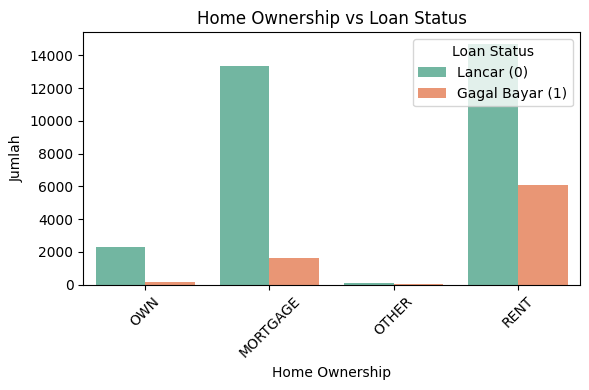

In [10]:
#2. Analisis Fitur Kategorikal terhadap Loan Status
#person_home_ownership
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='person_home_ownership', hue='loan_status', palette='Set2')
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Jumlah')
plt.legend(title='Loan Status', labels=['Lancar (0)', 'Gagal Bayar (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Status kepemilikan rumah tampaknya menjadi indikator yang kuat untuk risiko kredit. Berdasarkan data ini:

Peminjam yang menyewa rumah (RENT) memiliki risiko gagal bayar yang paling tinggi secara signifikan dibandingkan dengan mereka yang memiliki rumah, baik dengan cicilan (MORTGAGE) maupun yang sudah lunas (OWN).

Informasi ini sangat berharga untuk pemodelan risiko kredit. Sebuah model machine learning kemungkinan besar akan "belajar" bahwa status RENT merupakan fitur yang berkontribusi terhadap tingginya risiko seorang peminjam akan gagal bayar.

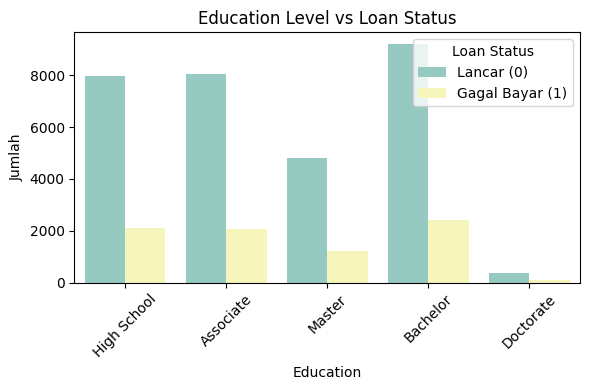

In [11]:
#person_education
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='person_education', hue='loan_status', palette='Set3')
plt.title('Education Level vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.legend(title='Loan Status', labels=['Lancar (0)', 'Gagal Bayar (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ini adalah temuan yang sangat menarik dan berbeda dari analisis sebelumnya (status rumah).

Tingkat pendidikan tampaknya tidak memiliki pengaruh yang signifikan terhadap kemungkinan seseorang gagal bayar.

Meskipun jumlah absolut kasus gagal bayar berbeda-beda, tingkat atau persentase risiko gagal bayar (sekitar 20-22%) ternyata sangat mirip (konsisten) di semua jenjang pendidikan.

Ini berarti, dalam dataset ini, seseorang dengan gelar S1 (Bachelor) memiliki kemungkinan gagal bayar yang hampir sama dengan seseorang lulusan SMA (High School). Dengan kata lain, tingkat pendidikan bukanlah prediktor yang kuat untuk menentukan risiko kredit, tidak seperti status kepemilikan rumah yang perbedaannya sangat jelas.

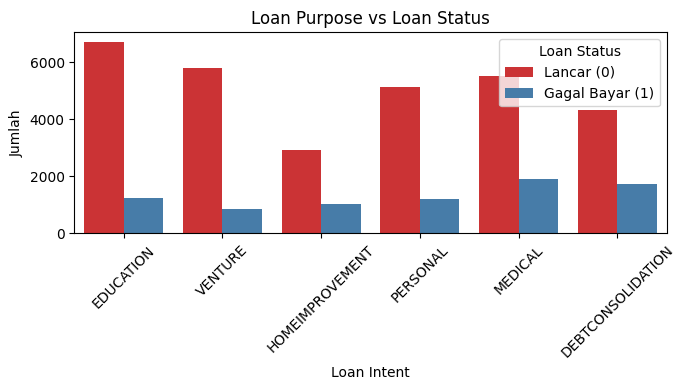

In [12]:
#loan_intent
plt.figure(figsize=(7,4))
sns.countplot(data=df_cleaned, x='loan_intent', hue='loan_status', palette='Set1')
plt.title('Loan Purpose vs Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Jumlah')
plt.legend(title='Loan Status', labels=['Lancar (0)', 'Gagal Bayar (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Tujuan pinjaman adalah faktor prediktor yang sangat kuat untuk menentukan risiko kredit. Ada pola yang jelas:

Pinjaman untuk tujuan yang produktif atau bersifat investasi (Pendidikan dan Usaha) memiliki risiko gagal bayar yang paling rendah. Hal ini kemungkinan karena pinjaman tersebut diharapkan dapat meningkatkan pendapatan di masa depan.

Sebaliknya, pinjaman yang bersifat konsumtif, darurat, atau untuk mengatasi masalah keuangan yang sudah ada (Konsolidasi Utang, Medis, Renovasi Rumah) memiliki risiko gagal bayar yang jauh lebih tinggi.

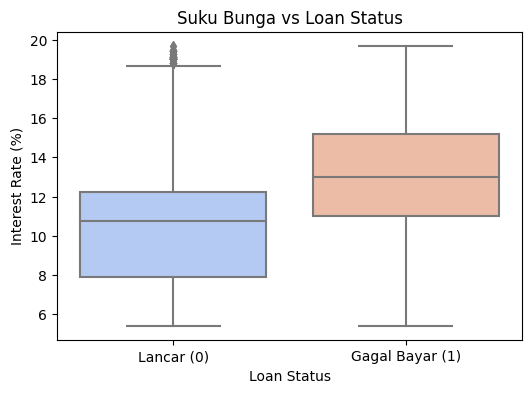

In [13]:
#3. Analisis Fitur Numerik terhadap Loan Status
#loan_int_rate
plt.figure(figsize=(6,4))
sns.boxplot(data=df_cleaned, x='loan_status', y='loan_int_rate', palette='coolwarm')
plt.title('Suku Bunga vs Loan Status')
plt.xticks([0, 1], ['Lancar (0)', 'Gagal Bayar (1)'])
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()


Ada perbedaan yang sangat jelas dan signifikan antara kedua kelompok tersebut.

1. Pinjaman yang mengalami Gagal Bayar secara konsisten memiliki Suku Bunga yang lebih tinggi daripada pinjaman yang Lancar.

Perhatikan poin kunci ini:

- Median Suku Bunga grup "Gagal Bayar" (sekitar 13%) jauh lebih tinggi daripada median grup "Lancar" (sekitar 10.8%).

- Seluruh kotak (distribusi 50% data utama) dari grup "Gagal Bayar" posisinya lebih tinggi daripada kotak grup "Lancar".

- Kuartil pertama (nilai 25% terendah) dari grup "Gagal Bayar" yang ada di sekitar 11%, nilainya hampir sama dengan median (nilai tengah) dari grup "Lancar". Ini adalah bukti kuat yang menunjukkan bahwa 75% dari pinjaman yang gagal bayar memiliki suku bunga yang lebih tinggi daripada separuh pinjaman yang lancar.

Mengapa ini terjadi?
1. Hubungan ini bersifat dua arah:

2. Penilaian Risiko: Pemberi pinjaman biasanya memberikan suku bunga yang lebih tinggi kepada peminjam yang dinilai lebih berisiko.

3. Beban Pembayaran: Suku bunga yang lebih tinggi membuat jumlah cicilan bulanan lebih besar, sehingga meningkatkan beban finansial peminjam dan memperbesar kemungkinan mereka untuk gagal bayar.

Dengan demikian, suku bunga adalah salah satu prediktor risiko kredit yang paling kuat, dan visualisasi ini membuktikannya dengan sangat jelas.

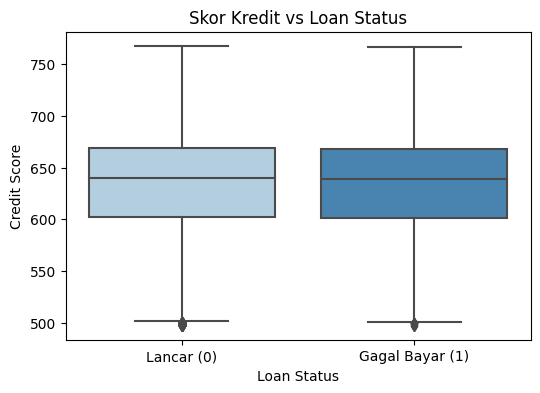

In [14]:
#credit_score
plt.figure(figsize=(6,4))
sns.boxplot(data=df_cleaned, x='loan_status', y='credit_score', palette='Blues')
plt.title('Skor Kredit vs Loan Status')
plt.xticks([0, 1], ['Lancar (0)', 'Gagal Bayar (1)'])
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()


Ini adalah temuan yang paling mengejutkan dari semua visualisasi yang telah kita lihat.

1. Hampir tidak ada perbedaan yang signifikan dalam distribusi skor kredit antara kelompok peminjam yang lancar dan yang gagal bayar.

2. Berbeda dengan suku bunga, status rumah, atau tujuan pinjaman yang menunjukkan perbedaan jelas, di sini kedua box plot terlihat sangat mirip. Median, rentang interkuartil (kotak), dan jangkauan data (kumis) dari kedua kelompok hampir tumpang tindih sepenuhnya.

- Apa artinya ini?
Berdasarkan visualisasi ini, skor kredit bukanlah prediktor yang kuat untuk menentukan risiko gagal bayar dalam dataset ini. Mengetahui skor kredit seseorang (misalnya 650) tidak memberikan banyak informasi untuk membedakan apakah ia akan lancar atau gagal bayar, karena skor tersebut sangat umum ditemukan di kedua kelompok.

Kemungkinan Penyebab Hasil yang Mengejutkan Ini:

1. Seleksi Awal Peminjam: Kemungkinan besar, pemberi pinjaman sudah menyaring calon peminjam di awal. Mereka mungkin hanya menyetujui pinjaman untuk orang-orang dengan skor kredit di rentang tertentu (misalnya, di atas 600). Akibatnya, data yang kita lihat di sini adalah data dari orang-orang yang sudah "lulus" seleksi awal, sehingga perbedaannya menjadi tidak terlihat.

2. Faktor Lain Lebih Dominan: Dalam dataset ini, bisa jadi faktor lain seperti suku bunga, tujuan pinjaman, dan status kepemilikan rumah memiliki pengaruh yang jauh lebih besar terhadap kemampuan bayar seseorang dibandingkan skor kredit mereka.

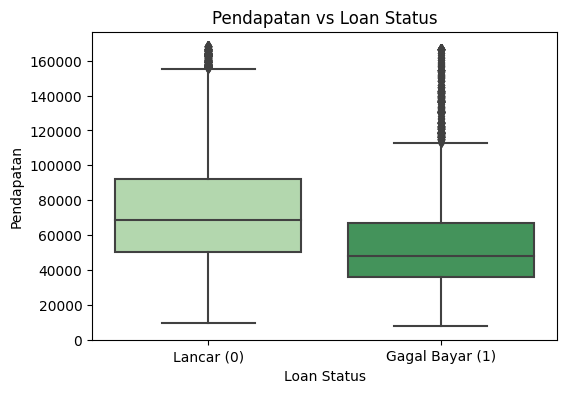

In [15]:
#person_income
plt.figure(figsize=(6,4))
sns.boxplot(data=df_cleaned, x='loan_status', y='person_income', palette='Greens')
plt.title('Pendapatan vs Loan Status')
plt.xticks([0, 1], ['Lancar (0)', 'Gagal Bayar (1)'])
plt.xlabel('Loan Status')
plt.ylabel('Pendapatan')
plt.show()


Visualisasi ini menyajikan dua temuan utama yang sangat menarik:

1. Pendapatan Rendah Berisiko Lebih Tinggi (Secara Umum)
Ada perbedaan yang sangat jelas antara kedua kelompok. Kotak distribusi untuk grup Gagal Bayar secara keseluruhan berada di posisi yang lebih rendah. Kuartil ketiga nilai 75% dari grup Gagal Bayar sekitar `$67,000 bahkan lebih rendah dari median nilai tengah grup Lancar sekitar $70,000.`

- Ini menegaskan bahwa secara umum, peminjam dengan pendapatan lebih rendah memiliki kecenderungan lebih tinggi untuk gagal bayar.

2. Pendapatan Tinggi Tidak Menjamin Pembayaran Lancar (Anomali Outlier)
Meskipun tren utamanya jelas, keberadaan banyak sekali outlier pada kelompok "Gagal Bayar" menunjukkan sebuah anomali penting.

- Terdapat sekelompok signifikan individu berpendapatan sangat tinggi yang tetap gagal bayar.

Mengapa ini terjadi?
Ini menunjukkan bahwa setelah melewati ambang batas pendapatan tertentu, faktor lain mungkin menjadi lebih dominan dalam menentukan risiko kredit. Kemungkinan penyebabnya antara lain:

- Gaya Hidup (Lifestyle): Pengeluaran yang sangat tinggi atau boros.

- Over-leverage: Mengambil utang dalam jumlah yang terlalu besar dibandingkan aset atau pendapatan.

- Guncangan Finansial: Kehilangan pekerjaan dengan gaji tinggi, kegagalan investasi, atau kejadian tak terduga lainnya.

Secara keseluruhan, pendapatan adalah prediktor yang baik, namun hubungannya tidak sesederhana "semakin tinggi pendapatan, semakin rendah risiko". Model risiko kredit yang canggih perlu mempertimbangkan interaksi pendapatan dengan faktor-faktor lain seperti total utang dan kebiasaan belanja.

# Feature Engineering

In [46]:
#encode kolom kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [47]:
# cretate predictor variables as X
X = df_cleaned.drop(['loan_status'], axis = 1)
# create target data as y
y = df_cleaned['loan_status']

In [48]:
# split data to train and test data
# where 30% of churn_data are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=1000
)

In [49]:
# drop certain column on train data
column_to_drop = ['person_emp_exp','cb_person_cred_hist_length']
X_train = X_train.drop(column_to_drop, axis = 1)

# drop certain column in test data
X_test = X_test.drop(column_to_drop, axis = 1)

In [50]:
# check train data dimension
X_train.shape

(26865, 11)

In [51]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file
23750,27.0,0,4,79285.0,0,10000.0,0,12.53,0.13,649,0
38556,24.0,0,1,121064.0,0,5000.0,4,10.80,0.04,628,1
43643,30.0,0,0,59255.0,3,15000.0,3,10.98,0.25,576,0
38353,23.0,1,0,54170.0,0,5000.0,1,13.47,0.09,695,1
15455,23.0,0,1,164222.0,0,8000.0,0,8.32,0.05,646,0


In [52]:
# check test data dimension
X_test.shape

(11514, 11)

In [53]:
# check train target counts
y_train.value_counts()

loan_status
0    21294
1     5571
Name: count, dtype: int64

In [54]:
# check test target counts
y_test.value_counts()

loan_status
0    9127
1    2387
Name: count, dtype: int64

In [55]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [57]:
# Konversi kembali ke DataFrame dengan nama kolom asli
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

In [58]:
X_train_std.shape, y_train.shape

((42588, 11), (42588,))

In [59]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file
0,27.0,0,4,79285.0,0,10000.0,0,12.53,0.13,649,0
1,24.0,0,1,121064.0,0,5000.0,4,10.80,0.04,628,1
2,30.0,0,0,59255.0,3,15000.0,3,10.98,0.25,576,0
3,23.0,1,0,54170.0,0,5000.0,1,13.47,0.09,695,1
4,23.0,0,1,164222.0,0,8000.0,0,8.32,0.05,646,0


# Modelling

In [60]:
#1. Import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [61]:
X_train_bal.columns = X_train_bal.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")


In [ ]:
#Model Logistic Regression
logreg_clf = LogisticRegression(
    random_state = 1000
)

#fit model to training data
logreg_clf.fit(X_train_std, y_train)

LogisticRegression(random_state=1000)

In [ ]:
# Model Random Forest
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train_std, y_train)

RandomForestClassifier(random_state=1000)

In [ ]:
# Model MLP
mlp_clf = MLPClassifier(
    random_state = 1000,
    hidden_layer_sizes = (8,),
    solver = 'sgd'
)

# fit model to training data
mlp_clf.fit(X_train_std, y_train)

MLPClassifier(hidden_layer_sizes=(8,), random_state=1000, solver='sgd')

In [67]:
# Model XGB
xgb_clf = XGBClassifier(
    random_state = 1000
)

# fit model no training data
xgb_clf.fit(X_train_std, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1000, ...)

In [68]:
# define LGBM model
lgbm_clf = LGBMClassifier(
    random_state=1000,
    n_jobs=-1
)

# fit model no training data
lgbm_clf.fit(X_train_std, y_train)

[LightGBM] [Info] Number of positive: 21294, number of negative: 21294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 42588, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_jobs=-1, random_state=1000)

# Model Evaluation

In [79]:
from sklearn.metrics import classification_report

print("="*50)
print("             Evaluasi Model Sebelum Tuning")
print("="*50)

# Dictionary model yang sudah dilatih sebelumnya
models = {
    "Logistic Regression": logreg_clf,
    "Random Forest": random_forest_clf,
    "MLP": mlp_clf,
    "XGBoost": xgb_clf,
    "LightGBM": lgbm_clf
}


# Ulangi prediksi untuk setiap model dan tampilkan classification report
for name, model in models.items():
    print(f"\n--- Classification Report untuk: {name} ---")
    
    # Gunakan X_test_std yang sudah di-scaling untuk prediksi
    y_pred = model.predict(X_test_std)
    
    # Cetak laporan klasifikasi dengan nama target yang jelas
    print(classification_report(y_test, y_pred, target_names=['Lancar (0)', 'Gagal Bayar (1)']))
    print("-" * (len(name) + 40))

             Evaluasi Model Sebelum Tuning

--- Classification Report untuk: Logistic Regression ---
                 precision    recall  f1-score   support

     Lancar (0)       0.97      0.84      0.90      9127
Gagal Bayar (1)       0.60      0.89      0.71      2387

       accuracy                           0.85     11514
      macro avg       0.78      0.86      0.81     11514
   weighted avg       0.89      0.85      0.86     11514

-----------------------------------------------------------

--- Classification Report untuk: Random Forest ---
                 precision    recall  f1-score   support

     Lancar (0)       0.95      0.92      0.93      9127
Gagal Bayar (1)       0.72      0.83      0.77      2387

       accuracy                           0.90     11514
      macro avg       0.84      0.88      0.85     11514
   weighted avg       0.91      0.90      0.90     11514

-----------------------------------------------------

--- Classification Report untuk: MLP ---
 

Berdasarkan metrik untuk kelas "Gagal Bayar (1)", berikut adalah peringkat model dari yang terbaik hingga terburuk:

1. XGBoost: Juara umum. Memiliki Precision tertinggi (84%) dan F1-Score tertinggi (82%). Ini adalah model yang paling seimbang dan paling bisa diandalkan. Ia sangat baik dalam menemukan nasabah berisiko (Recall 81%) dan prediksinya sangat akurat.

2. LightGBM: Peringkat kedua yang sangat kuat. Performanya hanya sedikit di bawah XGBoost di semua metrik.

3. Random Forest: Peringkat ketiga yang solid. Pilihan yang sangat baik dengan keseimbangan performa yang bagus.

4. MLP: Performa menengah. Tidak buruk, tapi kalah saing dengan model-model tree-based (RF, XGB, LGBM).

5. Logistic Regression: Paling lemah. Meskipun recall-nya tinggi, precision-nya yang sangat rendah membuatnya tidak praktis untuk digunakan karena akan menolak terlalu banyak pelanggan yang baik.

Rekomendasi Final: Gunakan model XGBoost. Model ini memberikan kombinasi terbaik antara kemampuan mendeteksi hampir semua kasus gagal bayar (Recall tinggi) dan keakuratan prediksi saat menandai seseorang sebagai berisiko (Precision tertinggi).

HYPER PARAMETER TUNNING

In [87]:
# ===================================================================
# Bagian 1: Persiapan Awal
# ===================================================================
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Pastikan variabel data yang sudah ada:
# X_train_std, y_train, X_test_std, y_test

# Metrik yang ingin kita optimalkan sekarang adalah F1-Score
SCORING_METRIC = 'f1'
print(f"Proses tuning akan dioptimalkan berdasarkan metrik: '{SCORING_METRIC}'")

# ===================================================================
# Bagian 2: Tuning Model satu per satu
# ===================================================================

# --- 2.1 Tuning XGBoost ---
print("\n" + "="*25, "Memulai Tuning XGBoost", "="*25)
xgb_clf = XGBClassifier(random_state=1000, use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
random_search_xgb_f1 = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid_xgb, n_iter=50, cv=5, scoring=SCORING_METRIC, n_jobs=-1, random_state=1000, verbose=1)
random_search_xgb_f1.fit(X_train_std, y_train)
print("\nParameter terbaik untuk XGBoost (dioptimalkan untuk F1):")
print(random_search_xgb_f1.best_params_)
print(f"Skor F1 terbaik (cross-validation): {random_search_xgb_f1.best_score_:.4f}")


# --- 2.2 Tuning LightGBM ---
print("\n" + "="*25, "Memulai Tuning LightGBM", "="*25)
lgbm_clf = LGBMClassifier(random_state=1000)
param_grid_lgbm = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [20, 31, 40, 50],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
random_search_lgbm_f1 = RandomizedSearchCV(estimator=lgbm_clf, param_distributions=param_grid_lgbm, n_iter=50, cv=5, scoring=SCORING_METRIC, n_jobs=-1, random_state=1000, verbose=1)
random_search_lgbm_f1.fit(X_train_std, y_train)
print("\nParameter terbaik untuk LightGBM (dioptimalkan untuk F1):")
print(random_search_lgbm_f1.best_params_)
print(f"Skor F1 terbaik (cross-validation): {random_search_lgbm_f1.best_score_:.4f}")


# --- 2.3 Tuning Random Forest ---
print("\n" + "="*25, "Memulai Tuning Random Forest", "="*25)
rf_clf = RandomForestClassifier(random_state=1000)
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
random_search_rf_f1 = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid_rf, n_iter=50, cv=5, scoring=SCORING_METRIC, n_jobs=-1, random_state=1000, verbose=1)
random_search_rf_f1.fit(X_train_std, y_train)
print("\nParameter terbaik untuk Random Forest (dioptimalkan untuk F1):")
print(random_search_rf_f1.best_params_)
print(f"Skor F1 terbaik (cross-validation): {random_search_rf_f1.best_score_:.4f}")


# ===================================================================
# Bagian 3: Evaluasi Final Model Hasil Tuning
# ===================================================================

# Ambil model terbaik dari setiap proses tuning
best_xgb_f1 = random_search_xgb_f1.best_estimator_
best_lgbm_f1 = random_search_lgbm_f1.best_estimator_
best_rf_f1 = random_search_rf_f1.best_estimator_

# Buat dictionary untuk model yang sudah di-tuning dengan F1-score
tuned_f1_models = {
    "XGBoost Tuned (F1)": best_xgb_f1,
    "LightGBM Tuned (F1)": best_lgbm_f1,
    "Random Forest Tuned (F1)": best_rf_f1
}

print("\n" + "="*20, "Evaluasi Final Setelah Tuning dengan F1-Score", "="*20)

# Evaluasi final pada data uji
for name, model in tuned_f1_models.items():
    print(f"\n--- Classification Report (Setelah Tuning): {name} ---")
    y_pred_tuned_f1 = model.predict(X_test_std)
    print(classification_report(y_test, y_pred_tuned_f1, target_names=['Lancar (0)', 'Gagal Bayar (1)']))

Proses tuning akan dioptimalkan berdasarkan metrik: 'f1'

========================= Memulai Tuning XGBoost =========================
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Parameter terbaik untuk XGBoost (dioptimalkan untuk F1):
{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
Skor F1 terbaik (cross-validation): 0.9458

========================= Memulai Tuning LightGBM =========================
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 21294, number of negative: 21294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 42588, number of used features: 11
[LightGBM] [Info] [binary:BoostFromS

In [89]:
import joblib

# === Ambil objek model terbaik dari hasil tuning sebelumnya ===
# Variabel ini berisi model XGBoost dengan parameter terbaik yang sudah dilatih
best_xgb_model = random_search_xgb_f1.best_estimator_ 

# === 1. Simpan Model XGBoost dengan format native-nya (.json) ===
# Metode .save_model() spesifik untuk XGBoost, lebih portabel antar versi
best_xgb_model.save_model('xgboost_model.json')
print("1. Model XGBoost terbaik berhasil disimpan sebagai 'xgboost_model.json'")

# === 2. Simpan Scaler yang sudah di-fit ===
# joblib.dump adalah cara umum untuk menyimpan objek Python (termasuk dari scikit-learn)
# 'scaler' adalah variabel StandardScaler kita yang sudah dilatih pada data training
joblib.dump(scaler, 'scaler.pkl')
print("2. Scaler berhasil disimpan sebagai 'scaler.pkl'")

# === 3. Simpan Label Encoders ===
# 'label_encoders' adalah dictionary yang berisi semua encoder untuk kolom kategorikal
joblib.dump(label_encoders, 'label_encoders.pkl')
print("3. Label Encoders berhasil disimpan sebagai 'label_encoders.pkl'")

print("\nSemua aset model dan preprocessing tools berhasil diarsipkan!")

1. Model XGBoost terbaik berhasil disimpan sebagai 'xgboost_model.json'
2. Scaler berhasil disimpan sebagai 'scaler.pkl'
3. Label Encoders berhasil disimpan sebagai 'label_encoders.pkl'

Semua aset model dan preprocessing tools berhasil diarsipkan!
